In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics
from sklearn.metrics import confusion_matrix,classification_report
#import pylab as pl

In [2]:
#We did prefer not to use test data for this scenario

X = np.random.uniform(-6, 6, size = (100,2));

n1,n2,n3,n4 = 100,100,100,100
n = n1+n2+n3+n4

X1 = np.random.normal([6,-4], 1.75, (n1, 2))
X2 = np.random.normal([-4,-4], 1.75, (n2, 2))
X3 = np.random.normal([7,4], 1.75, (n3, 2))
X4 = np.random.normal([-4,-4], 1.75, (n4, 2))

X = np.concatenate((X1,X2,X3,X4))
np.random.shuffle(X)

Y = 1*np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)
Y[Y==0] = -1

noiseLevel = 0.4
noise = noiseLevel * np.random.randn(n, 2)
X +=noise 


In [3]:
df_dict = {"X1":X[:,0], "X2":X[:,1],"Y":Y}

df = pd.DataFrame(df_dict)
df.head()

,X1,X2,Y
0,8.411566,-3.756050,1
1,9.727608,-1.621184,1
2,8.091409,3.565518,-1
3,8.029842,6.200010,-1
4,-3.057339,-5.396066,-1


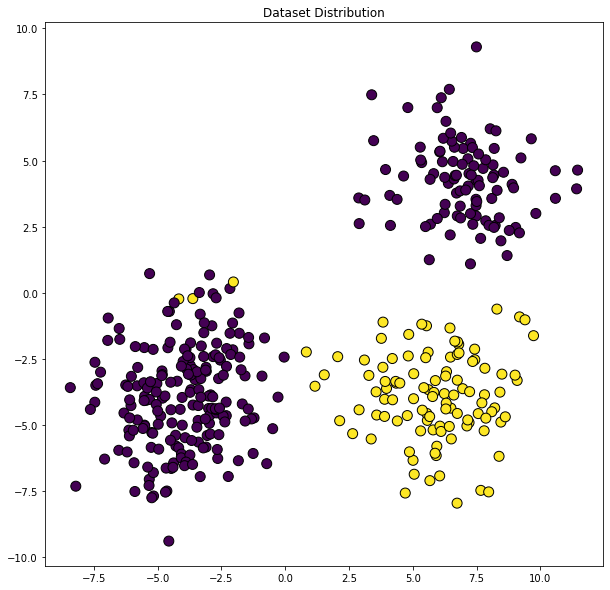

In [4]:
plt.figure(1, figsize=(10,10)) 
plt.title('Dataset Distribution')
plt.scatter(X[:, 0], X[:, 1], s=100, c=Y, edgecolors='k')
plt.show()

In [5]:
#find best degree

kfold=10
best_degree = 1
best_score = 0
scores = []

for i in range(1,10):
    svm_classifier = SVC(kernel="poly",degree=i)
    svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    
    if score > best_score:
        best_score=score
        best_degree=i
    print('Average accuracy in 10- fold cross-validation for SVM with degree',i , ' is ', score)

print("\n\nBest degree is",best_degree," with score ",best_score)

Average accuracy in 10- fold cross-validation for SVM with degree 1  is  0.9675
Average accuracy in 10- fold cross-validation for SVM with degree 2  is  0.9775
Average accuracy in 10- fold cross-validation for SVM with degree 3  is  0.9675
Average accuracy in 10- fold cross-validation for SVM with degree 4  is  0.965
Average accuracy in 10- fold cross-validation for SVM with degree 5  is  0.9475
Average accuracy in 10- fold cross-validation for SVM with degree 6  is  0.9349999999999999
Average accuracy in 10- fold cross-validation for SVM with degree 7  is  0.9175
Average accuracy in 10- fold cross-validation for SVM with degree 8  is  0.9175
Average accuracy in 10- fold cross-validation for SVM with degree 9  is  0.915


Best degree is 2  with score  0.9775


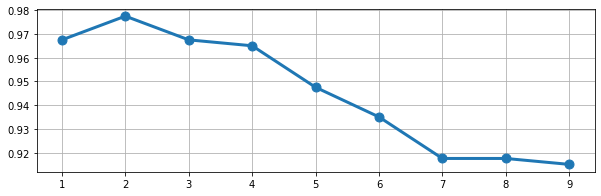

In [6]:
plt.figure(figsize = (10,3))

plt.plot(range(1,10),scores, marker='o', markersize=9, linewidth=3) ;

plt.grid(True)

In [7]:
#find optimum C

scores = []
best_C = 1
best_score = 0
rangeC = 1000
for c in range(1,rangeC):
    svm_classifier = SVC(kernel="poly",degree=best_degree,C=c/100)
    svmScores = cross_val_score(svm_classifier, X, Y.ravel(), cv=kfold, scoring="accuracy")
    score = statistics.mean(svmScores)
    scores.append(score)
    if score > best_score:
        best_score=score
        best_C=c/100
    #print('Average accuracy in 10- fold cross-validation for SVM with degree',best_degree ,"and C",c, ' is ', score)

print("\n\nBest C is",best_C," with score ",best_score)



Best C is 4.76  with score  0.9875


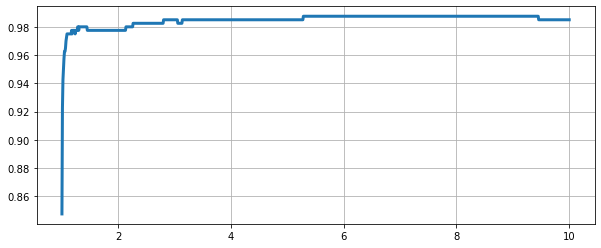

In [8]:

plt.figure(figsize = (10,4))

plt.plot(np.linspace(1,rangeC/100,rangeC-1),scores, linewidth=3) ;

plt.grid(True)

In [9]:
# fit the model
svm_classifier = SVC(kernel='linear',degree=best_degree, C=best_C)
svm_classifier.fit(X, Y)
Y_hat = svm_classifier.predict(X)
print(classification_report(Y,Y_hat))


              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       293
           1       0.96      0.91      0.93       107

    accuracy                           0.96       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.96      0.96       400



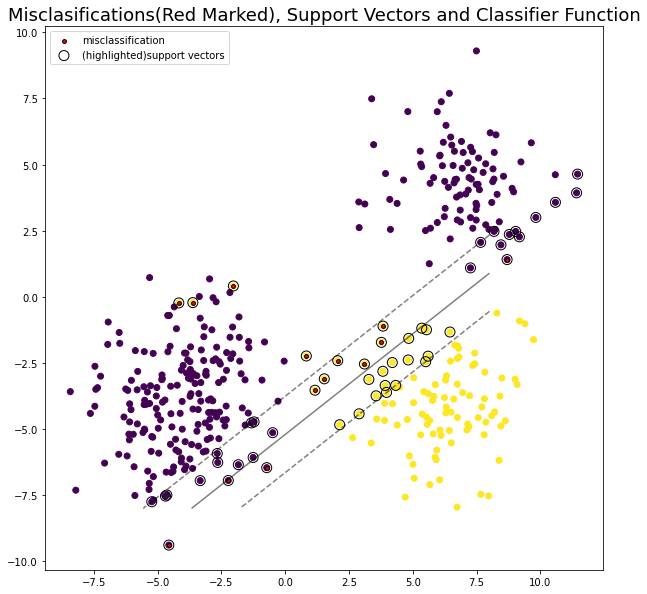

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

squareSpace = 8
xx, yy = np.meshgrid(np.linspace(-squareSpace, squareSpace, 500), np.linspace(-squareSpace, squareSpace, 500))
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot the dataset
ax.scatter(X[:,0], X[:,1], c=Y)

#show misclassification
wrong = (Y == Y_hat)
wrong = X[wrong==False]
ax.scatter(wrong[:,0], wrong[:,1], s=15,alpha = 1, linewidth=1, facecolors='red', edgecolors='k', label="misclassification")

# Get the separating hyperplane
Z = svm_classifier.decision_function(xy).reshape(xx.shape)

# Draw the decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

support_vecX1 = svm_classifier.support_vectors_[:, 0]
support_vecX2 = svm_classifier.support_vectors_[:, 1]

# Highlight support vectors with a circle around them
ax.scatter(support_vecX1, support_vecX2, s=100, linewidth=1, facecolors='none', edgecolors='k',label='(highlighted)support vectors')
plt.legend()
plt.title("Misclasifications(Red Marked), Support Vectors and Classifier Function",fontsize=18)
plt.show()

In [11]:
conf = confusion_matrix(Y, Y_hat)


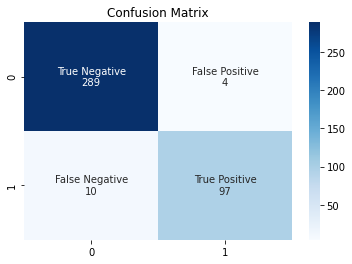

In [12]:

groups = ['True Negative','False Positive','False Negative','True Positive']

plt.title('Confusion Matrix')

group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(groups,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sn.heatmap(conf, annot=labels, fmt="", cmap='Blues')
plt.show()